In [234]:
from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import mutual_info_regression
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import random
import math

$$ \frac{\int_y \int_x P_{(X,Y)}(x,y)log \left( \frac{P_{(X,Y)}(x,y)}{P_X (x) P_Y(y)} \right) dx dy }{ (cov(X,Y)) / (\sigma_x \sigma_y)}$$


where $P_{(X,Y)}$ is the joint probability density function of $X$ and $Y$, and  
$P_X$ and $P_Y$ are the marginal probability density functions of $X$ and $Y$ respectively.

The following cell contains various transformations of the above in  
an attempt to resize the output appropriately. 

In [226]:
# def scorer(rho, mi):
#     return mi / (1+abs(rho))

# def scorer(rho, mi):
#     return (1+abs(rho)) / mi

# def scorer(rho, mi):
#     return mi / (2*+abs(rho))

# def scorer(rho, mi):
#     return mi / (2*+abs(rho)**0.5) -1

def scorer(rho, mi):
    return math.log(mi**.05 / (2*+abs(rho)))

## Helper Functions

In [235]:
def jitter(a, n):
    v = 1/n
    x = [i+(random.random()*2-1) / v for i in a]
    return x


# def calculater(x,y):
#     rho = pearsonr(x,y)[0]
#     mi = mutual_info_regression([[i] for i in x], y)[0]
#     score = scorer(rho, mi)
#     return score, rho, mi


def calculater(x,y):
    rho = spearmanr(x,y)[0]
    mi = mutual_info_regression([[i] for i in x], y)[0]
    score = scorer(rho, mi)
    return score, rho, mi


def printer(x):
    print('Score: ',x[0])
    print('Rho:   ',x[1])
    print('S:     ',x[2])


def evaluate_fx(x,y):
    for i in [0.001, 0.01, 0.1, 0.2, 0.5]:
        xj = jitter(x, i)
        yj = jitter(y, i)
        params = calculater(xj, yj)
        printer(params)
        plt.scatter(xj,yj)
        plt.show()

## Updated Function

$$ \frac{\log(\log(\int_y \int_x P_{(X,Y)}(x,y)\log \left( \frac{P_{(X,Y)}(x,y)}{P_X (x) P_Y(y)} \right) dx dy ))}{ 2 * | cov(X,Y) / (\sigma_x \sigma_y) |}$$

### Straight Line

Score:  -0.6081712004918759
Rho:    1.0
S:      5.471318346397831


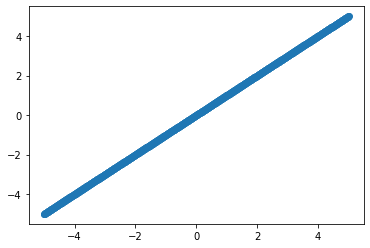

Score:  -0.6102088467367055
Rho:    0.999997068799464
S:      5.252520477599964


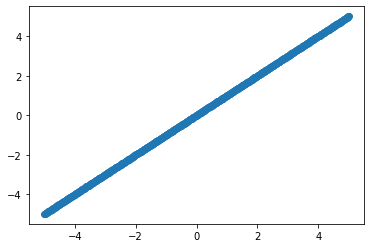

Score:  -0.6312846959020499
Rho:    0.9996117056596099
S:      3.4194588181109227


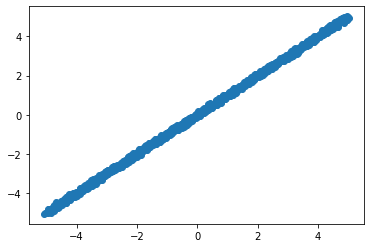

Score:  -0.6411994727742399
Rho:    0.9984047210274756
S:      2.73743978900178


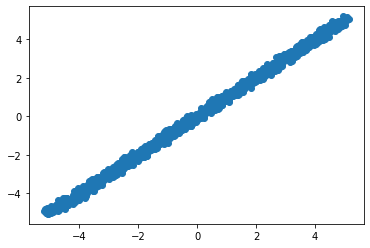

Score:  -0.6532267693477652
Rho:    0.9905590218165068
S:      1.838025118215564


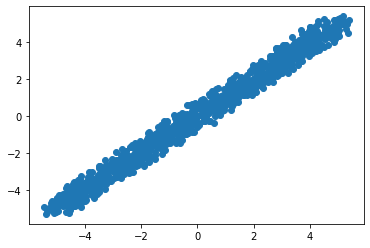

In [236]:
x = [(i-500)/100 for i in range(1001)]
y = x

evaluate_fx(x,y)

### Parabola

Score:  8.946732893290564
Rho:    6.967882416984212e-05
S:      3.9169742135870442


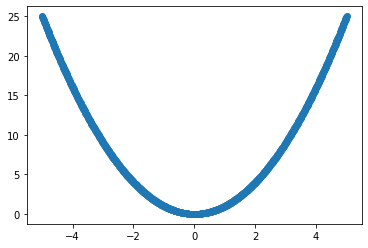

Score:  8.407726081461176
Rho:    -0.00011947334103022725
S:      3.931886194881927


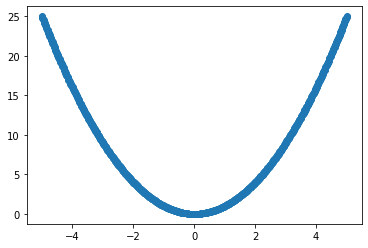

Score:  7.880494211254464
Rho:    0.00019923788786064232
S:      2.865111365297595


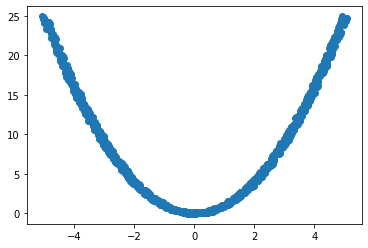

Score:  7.159747718838153
Rho:    0.00040541494433710005
S:      2.3300943474826634


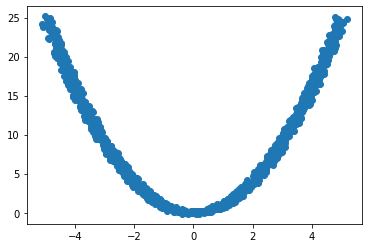

Score:  5.525821913403672
Rho:    -0.002033248188936811
S:      1.5173546342547666


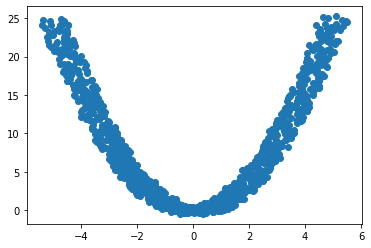

In [237]:
x = [(i-500)/100 for i in range(1001)]
fx = lambda x: 0+(x)**2
y = [fx(i) for i in x]

evaluate_fx(x,y)

### Cubic Curve

Score:  -0.6200369420306444
Rho:    0.9999973918297272
S:      4.315238550914177


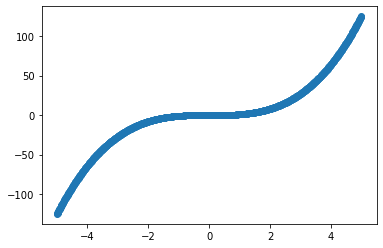

Score:  -0.6197052760426269
Rho:    0.9999549911166676
S:      4.34027579106259


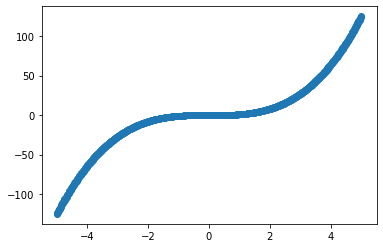

Score:  -0.6299516625452739
Rho:    0.9992715069361776
S:      3.488023311672397


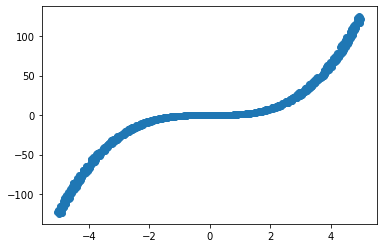

Score:  -0.6383649124784878
Rho:    0.9982479077808419
S:      2.888024727275397


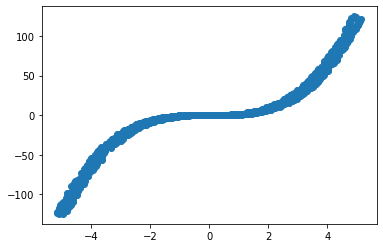

Score:  -0.6485146798442103
Rho:    0.9926946825629461
S:      2.1085644816531954


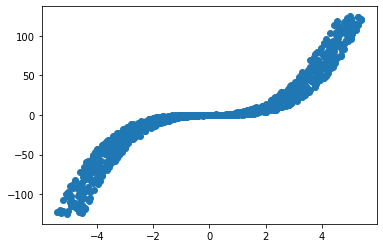

In [238]:
x = [(i-500)/100 for i in range(1001)]
fx = lambda x: 0+(x)**3
y = [fx(i) for i in x]


evaluate_fx(x,y)

### Y = Abs(X)

Score:  9.964367039397692
Rho:    2.5244216860983324e-05
S:      4.104217590011361


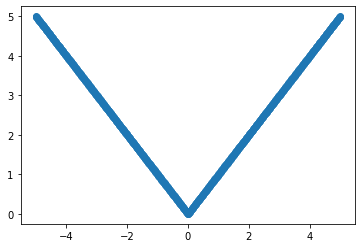

Score:  8.14239126462952
Rho:    0.0001562389706102281
S:      4.171566835282684


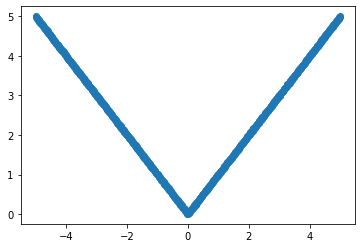

Score:  6.178650090198672
Rho:    -0.0010894135804315444
S:      2.7010237634596383


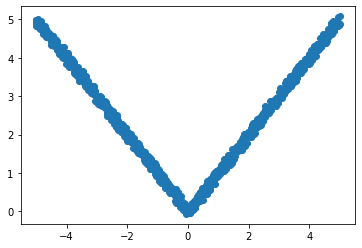

Score:  6.096631388588197
Rho:    0.0011655649739482072
S:      2.023005579436184


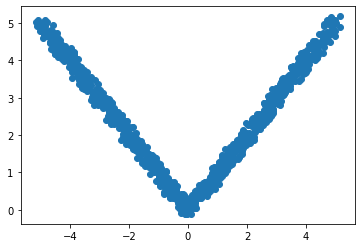

Score:  3.5284494550426957
Rho:    -0.014814323401149748
S:      1.2076995298824529


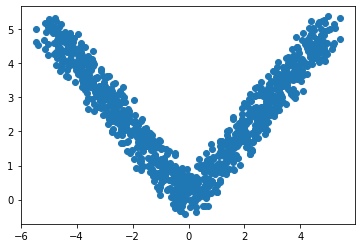

In [239]:
x = [(i-500)/100 for i in range(1001)]
fx = lambda x: abs(x)
y = [fx(i) for i in x]


evaluate_fx(x,y)

### Exponential

Score:  -0.6402643487086485
Rho:    0.9999835254565794
S:      2.878666434815808


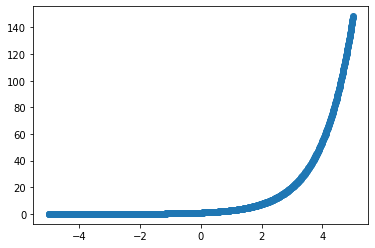

Score:  -0.6384097023066166
Rho:    0.9991651342669307
S:      2.9389291388565795


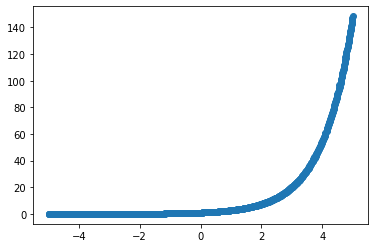

Score:  -0.6309514568081267
Rho:    0.9845089760538863
S:      2.538743322326853


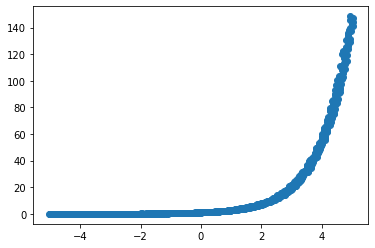

Score:  -0.6226679914666555
Rho:    0.9685005294107091
S:      2.158597686721922


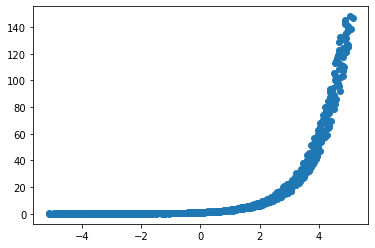

Score:  -0.602575961790067
Rho:    0.9332517063774548
S:      1.5369773379551357


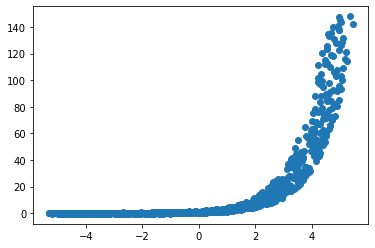

In [240]:
x = [(i-500)/100 for i in range(1001)]
fx = lambda x: math.e**x
y = [fx(i) for i in x]


evaluate_fx(x,y)

### Sine(X)

Score:  0.7778024878004081
Rho:    -0.24374271237744288
S:      3.274456880798601


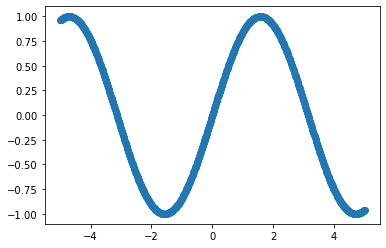

Score:  0.7729180240667756
Rho:    -0.24489791645480266
S:      3.2642421960073214


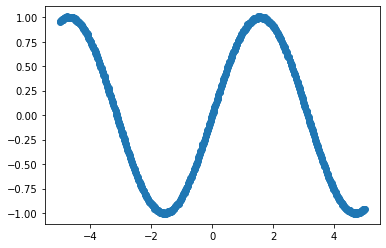

Score:  0.7870768303292852
Rho:    -0.2352742945677077
S:      1.9433543498926698


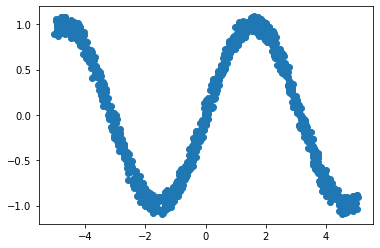

Score:  0.8143991110249024
Rho:    -0.22554219433261347
S:      1.441905311456619


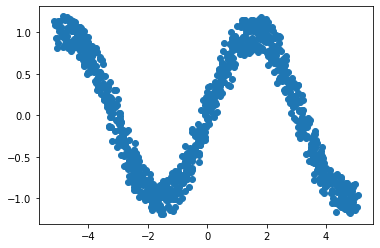

Score:  0.8086399958643534
Rho:    -0.21973586892149766
S:      0.7627404574452754


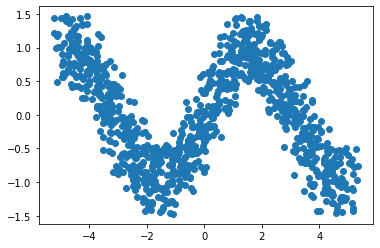

In [241]:
x = [(i-500)/100 for i in range(1001)]
fx = lambda x: math.sin(x)
y = [fx(i) for i in x]


evaluate_fx(x,y)